
# Steps to follow
# 1) EDA
# 2) Split dataset
# 3) One hot encoding
# 4) Missing value imputation
# 5) Normalization or Standardization
# 6) Remove Outliers
# 7) PCA
# 8) Feature Selection


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
import xgboost as XGB


In [5]:
Train = pd.read_csv(r"C:\Users\A\Desktop\kaggle\train.csv")
Test= pd.read_csv(r"C:\Users\A\Desktop\kaggle\test.csv")
#Train.head()

In [6]:
Train = Train.drop("Id",axis = 1)   #### ID is an unneessary column

# EDA

In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
Train.shape

(1460, 80)

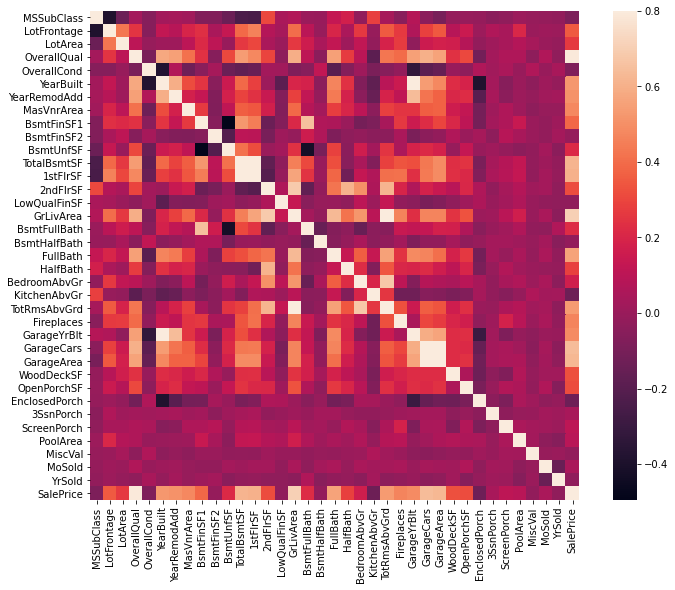

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = Train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,square=True);

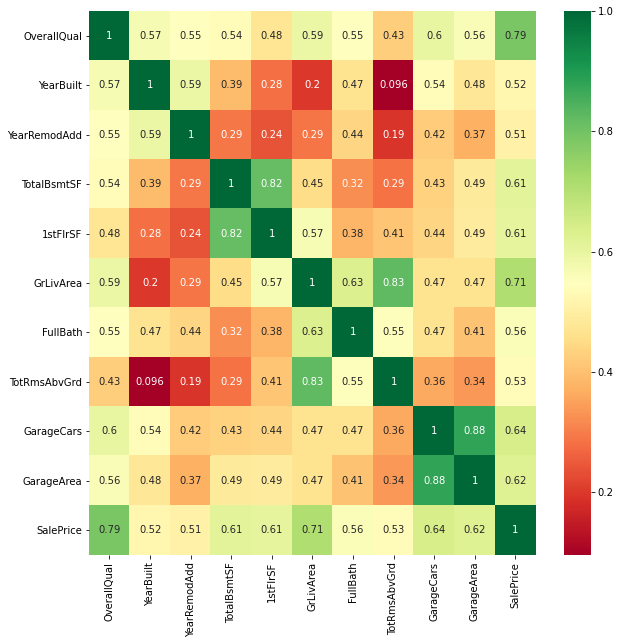

In [10]:
corr = Train.corr()
highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(Train[highest_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
print(corr.index[abs(corr["SalePrice"])>0.5])

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [12]:
y_train = Train['SalePrice']
test_id = Test['Id']
dataset = pd.concat([Train, Test], axis=0, sort=False)
dataset = dataset.drop(['SalePrice'], axis=1)


## impute columns values with repsect to mean and median values
## the value which is near to 25% is imputed here

In [13]:
count = 0
null_value_columns=[]
for i in dataset.columns:   #### find out all the columns with null values
    #print(i + ":", end = " ")
    #print(dataset[i].isna().sum())
    if dataset[i].isna().sum() > 0:
        null_value_columns.append(i)
        count +=1
#print("total columns with null values : " + str(count))    

In [14]:
print("columns with null values :", null_value_columns)
print("\n")
highest_corr_features_list=list(highest_corr_features)
print("columns of high correlation :", highest_corr_features_list)
print("\n")

unwanted_columns=[]
unwanted_count =0 
for columns in null_value_columns:
    if columns not in highest_corr_features_list:
        unwanted_columns.append(columns)
        unwanted_count +=1
print("unwanted columns:", unwanted_columns )  




### drop features that are correlated with each other
#mat = data.corr()
#list_of _fearture =[i for i in mat]
#set_of_drop_features= set()
#for i in range(list(set_of_drop_features)):
 #   for j in range(i+1,len(list_of_features)):
  #      feature1=list_of_features[i]
   #     feature2=list_of_features[j]
    #    if abs(mat[feature1][feature2]) > 0.7:
     #       set_of_drop_features.add(feature1)
#data= data.drop(set_of_drop_features,axis =1)

###Drop features that are not correlated with output

##not_correlated =[column for column in data if abs(data[column].corr(data["SalePrice"])) < 0.0045]
###data = data.drop(set_of_drop_features, axis=1)

columns with null values : ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'Id']


columns of high correlation : ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


unwanted columns: ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Funct

In [15]:
#### delete unwanted columns because correlation is less than 0.5

for columns in unwanted_columns:
    dataset = dataset.drop([columns], axis=1)

In [16]:
dataset

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,61,0,0,0,0,0,2,2008,Normal
1,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,298,0,0,0,0,0,0,5,2007,Normal
2,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,0,42,0,0,0,0,0,9,2008,Normal
3,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,0,35,272,0,0,0,0,2,2006,Abnorml
4,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,192,84,0,0,0,0,0,12,2008,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,...,0,0,0,0,0,0,0,6,2006,Normal
1455,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,80,32,0,0,0,0,700,7,2006,Normal


In [17]:
count = 0
for i in dataset.columns:   #### find out all the columns with null values
    print(i + ":", end = " ")
    print(dataset[i].isna().sum())
    if dataset[i].isna().sum() > 0:
        count +=1
#print("total columns with null values : " + str(count))

MSSubClass: 0
LotArea: 0
Street: 0
LotShape: 0
LandContour: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
ExterQual: 0
ExterCond: 0
Foundation: 0
TotalBsmtSF: 1
Heating: 0
HeatingQC: 0
CentralAir: 0
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
TotRmsAbvGrd: 0
Fireplaces: 0
GarageCars: 1
GarageArea: 1
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 0
MiscVal: 0
MoSold: 0
YrSold: 0
SaleCondition: 0


In [18]:
### impute all numerical and categorical values in one step

dataset = dataset.apply(lambda x:x.fillna(x.mean()) 
                    if x.dtype == "float" or x.dtype =="int64" 
                    else x.fillna(x.value_counts().index[0]))


#Train["LotFrontage"] = Train["LotFrontage"].fillna(Train["LotFrontage"].median())        
    

In [16]:
#Train["Alley"].unique()
#Train["Alley"] = Train["Alley"].fillna(Train["Alley"].value_counts().index[0])
#Train["MasVnrType"] = Train["MasVnrType"].fillna(Train["MasVnrType"].value_counts().index[0])
#Train["MasVnrType"].unique()

In [17]:
#Train["MasVnrArea"] = Train["MasVnrArea"].fillna(Train["MasVnrArea"].median())        
#train["MasVnrArea"].isna().sum()

In [18]:
#print(Train["BsmtQual"].unique())
#print(Train["BsmtCond"].unique())
#print(Train["BsmtExposure"].unique()) 
#print(Train["BsmtFinType1"].unique())
#print(Train["BsmtFinType2"].unique())
#print(Train["Electrical"].unique())

#Train["BsmtQual"] = Train["BsmtQual"].fillna(Train["BsmtQual"].value_counts().index[0])
#Train["BsmtCond"] = Train["BsmtCond"].fillna(Train["BsmtCond"].value_counts().index[0])
#Train["BsmtExposure"] = Train["BsmtExposure"].fillna(Train["BsmtExposure"].value_counts().index[0])
#Train["BsmtFinType1"] = Train["BsmtFinType1"].fillna(Train["BsmtFinType1"].value_counts().index[0])
#Train["BsmtFinType2"] = Train["BsmtFinType2"].fillna(Train["BsmtFinType2"].value_counts().index[0]) 
#Train["Electrical"] = Train["Electrical"].fillna(Train["Electrical"].value_counts().index[0]) 

In [19]:
#print(Train["FireplaceQu"].unique())
#print(Train["GarageType"].unique())
#print(Train["GarageYrBlt"].unique())
#print(Train["GarageFinish"].unique())
#print(Train["GarageQual"].unique())
#print(Train["GarageCond"].unique())

#Train["FireplaceQu"] = Train["FireplaceQu"].fillna(Train["FireplaceQu"].value_counts().index[0])
#Train["GarageType"] = Train["GarageType"].fillna(Train["GarageType"].value_counts().index[0])
#Train["GarageFinish"] = Train["GarageFinish"].fillna(Train["GarageFinish"].value_counts().index[0])
#Train["GarageQual"] = Train["GarageQual"].fillna(Train["GarageQual"].value_counts().index[0])
#Train["GarageCond"] = Train["GarageCond"].fillna(Train["GarageCond"].value_counts().index[0])

#Train["GarageYrBlt"] = Train["GarageYrBlt"].fillna(Train["GarageYrBlt"].median())


In [20]:
#print(Train["PoolQC"].unique())
#print(Train["Fence"].unique())
#print(Train["MiscFeature"].unique())

#Train["PoolQC"] = Train["PoolQC"].fillna(Train["PoolQC"].value_counts().index[0])
#Train["Fence"] = Train["Fence"].fillna(Train["Fence"].value_counts().index[0])
#Train["MiscFeature"] = Train["MiscFeature"].fillna(Train["MiscFeature"].value_counts().index[0])



In [19]:
## for checking for null values after imputation
count = 0
for i in dataset.columns:   #### find out all the columns with null values
    print(i + ":", end = " ")
    print(dataset[i].isna().sum())
    if dataset[i].isna().sum() > 0:
        count +=1
print("total columns with null values : " + str(count))

MSSubClass: 0
LotArea: 0
Street: 0
LotShape: 0
LandContour: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
ExterQual: 0
ExterCond: 0
Foundation: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
TotRmsAbvGrd: 0
Fireplaces: 0
GarageCars: 0
GarageArea: 0
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 0
MiscVal: 0
MoSold: 0
YrSold: 0
SaleCondition: 0
total columns with null values : 0


# Transformation of target variable 
# only used in regression kind of problem

C:\Users\A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

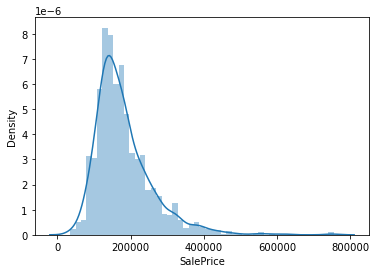

In [20]:

%matplotlib inline 
#Train['SalePrice'].hist(bins=50)
sns.distplot(Train['SalePrice'])

C:\Users\A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


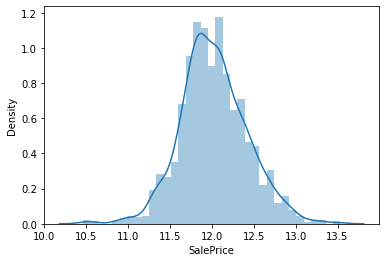

In [21]:
#from scipy.stats import norm, skew
Train['SalePrice'] = np.log1p(Train['SalePrice'])
sns.distplot(Train['SalePrice']);

# distinguinsh between categorical and numeric columns.

In [62]:
## categorised for easy  preprocessing
numeric_data = dataset.select_dtypes(include=[np.number])
categorical_data = dataset.select_dtypes(exclude=[np.number])


In [63]:
numeric_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.631370,2.306780,7,1.026672,2.152099,2003,2.048136,2.048136,2.047835,0.0,...,548.0,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.00000,2,2008
1,1.397363,2.319405,6,1.162283,2.150521,1976,2.096943,2.096943,0.000000,0.0,...,460.0,1.902174,0.000000,0.000000,0.0,0.0,0.0,0.00000,5,2007
2,1.631370,2.334879,7,1.026672,2.151983,2002,2.057383,2.057383,2.049631,0.0,...,608.0,0.000000,1.560500,0.000000,0.0,0.0,0.0,0.00000,9,2008
3,1.660640,2.318892,7,1.026672,2.146866,1970,2.032004,2.062933,2.032004,0.0,...,642.0,0.000000,1.522467,1.888504,0.0,0.0,0.0,0.00000,2,2006
4,1.631370,2.357574,8,1.026672,2.151925,2000,2.084931,2.084931,2.074473,0.0,...,836.0,1.834610,1.694266,0.000000,0.0,0.0,0.0,0.00000,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.805236,2.148139,4,1.124748,2.150167,1970,1.988484,1.988484,1.988484,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000,6,2006
1455,1.805236,2.145577,4,1.026672,2.150167,1970,1.988484,1.988484,1.988484,0.0,...,286.0,0.000000,1.439569,0.000000,0.0,0.0,0.0,0.00000,4,2006
1456,1.397363,2.389087,5,1.124748,2.149575,1996,2.093184,2.093184,0.000000,0.0,...,576.0,1.968973,0.000000,0.000000,0.0,0.0,0.0,0.00000,9,2006
1457,1.696413,2.327628,5,1.026672,2.151459,1992,2.056267,2.064116,0.000000,0.0,...,0.0,1.685370,1.503301,0.000000,0.0,0.0,0.0,2.02188,7,2006


In [26]:
#categorical_data
#categorical_cols = categorical_data.columns
#print(categorical_cols)

In [24]:
from scipy.stats import skew
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
skewed = dataset[numeric_columns].apply(lambda x: skew(x))
high_skew_data = skewed[abs(skewed) > 0.5]
high_skew_data


MSSubClass        1.375457
LotArea          12.822431
OverallCond       0.570312
YearBuilt        -0.599806
TotalBsmtSF       1.162484
1stFlrSF          1.469604
2ndFlrSF          0.861675
LowQualFinSF     12.088761
GrLivArea         1.269358
HalfBath          0.694566
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

C:\Users\A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\A\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

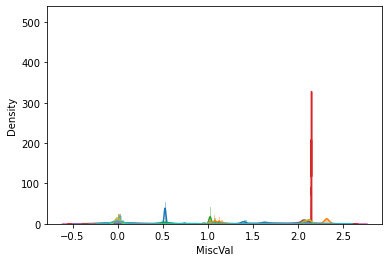

In [26]:
for i in high_skew_data.index:
    dataset[i] = np.log1p(dataset[i])
    sns.distplot(dataset[i]);

# Lable encoding and One hot Encoding to convert categorical values into numerical

In [ ]:
### Lable encoding technique does not work here because it converts data into ordinal data

###trial = Train
### from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
####le = LabelEncoder()
# apply le on categorical feature columns
#### trial[categorical_cols] = trial[categorical_cols].apply(lambda col: le.fit_transform(col))

In [27]:
# Using dummy variables
ohe_data = pd.get_dummies(categorical_data,drop_first=True)
ohe_data

,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1455,1,0,0,1,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1456,1,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1457,1,0,0,1,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,1,0


In [78]:
### using One hot encoding
#from sklearn.preprocessing import OneHotEncoder
#OHE = OneHotEncoder(drop='first')
#OHE.fit(categorical_data)
#OHE_data=OHE.transform(categorical_data).toarray()
#OHE_data_df=pd.DataFrame(OHE_data)
#OHE_data_df

from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(drop='first').fit_transform(categorical_data).toarray()
OHE 

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [79]:
OHE_df = pd.DataFrame(OHE)
OHE_df

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2915,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# merge two data frames

In [59]:
#num_data= np.array(numeric_data)
#OHE_data = np.array(ohe_data)
#mixed_dataset = pd.concat([ohe_data, numeric_data], axis=1, sort=False)
#mixed_dataset

In [86]:
##### Numeric columns remain first and then append categorical
#final_data = np.append(arr=num_data, values=OHE, axis=1)
##final_data = pd.DataFrame(final_data)
###final_data




#categorical columns remain first and then append numerical as our target variable is numeric variable.
#final_data = np.append(arr=OHE, values=num_data, axis=1)
#final_data = pd.DataFrame(final_data)
#final_data
Data

NameError: name 'Data' is not defined

# Feature Scaling



In [ ]:
#train_features = final_data.drop([245],axis=1)
#train_target = final_data[245]
#train_features

#test_features = pd.read_csv(r"C:\Users\A\Desktop\kaggle\test.csv")
#test_features

In [53]:
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler() 
#scaled_data = scaler.fit_transform(mixed_dataset)
#scaled_data
#df= pd.DataFrame(scaled_data)
#df

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(mixed_dataset)
scaled_data
df= pd.DataFrame(scaled_data)
df

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,...,0.348900,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646
1,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,5.774182,-0.069421,...,-0.059792,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962
2,0.064249,-0.1635,-0.07424,-1.324301,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,...,0.627553,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646
3,0.064249,-0.1635,-0.07424,-1.324301,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,...,0.785457,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569
4,0.064249,-0.1635,-0.07424,-1.324301,-0.207057,-0.144867,0.33656,-0.253305,5.774182,-0.069421,...,1.686437,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,...,-2.196138,-0.740760,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.078505,-1.363569
2915,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,...,-0.867888,-0.740760,-0.347624,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.815344,-1.363569
2916,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,...,0.478938,3.006130,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,-1.363569
2917,0.064249,-0.1635,-0.07424,0.755115,-0.207057,-0.144867,0.33656,-0.253305,-0.173185,-0.069421,...,-2.196138,-0.108374,-0.229217,-0.359601,-0.103331,-0.285935,-0.06315,1.144312,0.289914,-1.363569


In [33]:
#test_features_scaled_data= scaler.transform(test_features)
#test_features_scaled_data

# Dimentionality Reduction using PCA

In [81]:
#from sklearn.decomposition import PCA
#pca - keep 90% of variance
#pca = PCA(0.90)
#pca = PCA(n_components=2)
#principal_components = pca.fit_transform(df)
#principal_df = pd.DataFrame(data = principal_components)
#print(principal_df.shape)

In [83]:
#principal_df

# Feature selection 
# this dataset consists categorical feature thats why we have to do it after one hot encoding otherwise before that

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
#cor = final_data.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
#plt.show()

In [ ]:
## def correlation(dataset, threshold):
   ### col_corr = set()  # Set of all the names of correlated columns
    ###corr_matrix = dataset.corr()
    ### for i in range(len(corr_matrix.columns)):
        ### for j in range(i):
            ### if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                ### colname = corr_matrix.columns[i]  # getting the name of column
                ### col_corr.add(colname)
    ### return col_corr

In [ ]:
### corr_features = correlation(final_data, 0.9)
### set(corr_features)

In [54]:
x_train =df[:len(y_train)]
x_test = df[len(y_train):]
print(x_train.shape)
print(x_test.shape)

(1460, 132)
(1459, 132)


In [37]:
import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
the_model.fit(x_train, y_train)


#from lightgbm import LGBMRegressor
#the_model = LGBMRegressor(n_estimators = 1000)
#the_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:

#y_predict = np.floor(np.expm1(the_model.predict(x_test)))
y_predict = the_model.predict(x_test)

#y_predict = the_model.predict(x_test)
y_predict

C:\Users\A\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([129680.65 , 164941.94 , 189782.53 , ..., 154776.92 , 115316.805,
       226507.98 ], dtype=float32)

In [39]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_predict
sub.to_csv(r'C:\Users\A\Desktop\kaggle\mysubmission.csv',index=False)